In [135]:
import pandas as pd
import numpy as np
from src.scoring import *
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from src.roc import plot_roc
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate, train_test_split, RepeatedStratifiedKFold, StratifiedKFold
import seaborn as sn
#from sklearn.metrics import plot_roc_curve
%matplotlib inline
plt.style.use('fivethirtyeight')

In [121]:
df = pd.read_csv('data/Task2inputs.csv')
y = df.pop('fraud')
df.head()

,amount,hour1,state1,zip1,custAttr1,custAttr2,field2,hour2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,field3_scld,field4_sqd,field4_log,zip_log,amount_root,field1__1,field1__2,field1__3,field1__4
0,12.95,0,WA,986,1234567890123456,luhxsodzmjhng7@comcast.net,0,0,0,-723,19,0,0,0,0,0,1,0.745739,361,2.944439,6.893656,3.598611,0,0,0,0
1,38.85,0,WA,980,1234567890123457,pfixyiqfpvkcg@zjyxs.net,1,0,0,5497,14,1,0,0,1,0,1,0.923596,196,2.639057,6.887553,6.232977,0,0,1,0
2,38.85,0,KY,402,1234567890123458,shbjoldciswwm@aol.com,1,0,0,-4420,23,0,0,1,1,0,1,0.640026,529,3.135494,5.996452,6.232977,0,1,0,0
3,12.95,0,CA,958,1234567890123459,ipbvtdfkhhfws@sbcglobal.net,0,0,0,5010,31,0,0,1,0,0,1,0.909671,961,3.433987,6.864848,3.598611,0,0,1,0
4,38.85,0,GA,300,1234567890123460,ivfuvxiennhdp@bellsouth.net,1,0,0,-4074,21,0,0,1,0,0,1,0.649920,441,3.044522,5.703782,6.232977,0,0,1,0


In [125]:
df.drop(columns=['state1', 'custAttr2'], inplace=True)

In [130]:
df['zip1'] = df.zip1.apply(lambda int_: str(int_))
df['custAttr1'] = df.custAttr1.apply(lambda int_: str(int_))
df['hour1'] = df.hour1.apply(lambda int_: str(int_))

In [131]:
X_main, X_holdout, y_main, y_holdout = train_test_split(df, y, random_state=7, test_size=.35,stratify=y)

In [132]:
feats = ['hour1', 'zip1', 'custAttr1']
#cat_pool = Pool(df, cat_features=feats)

cbc = CatBoostClassifier(cat_features=feats, verbose=False)

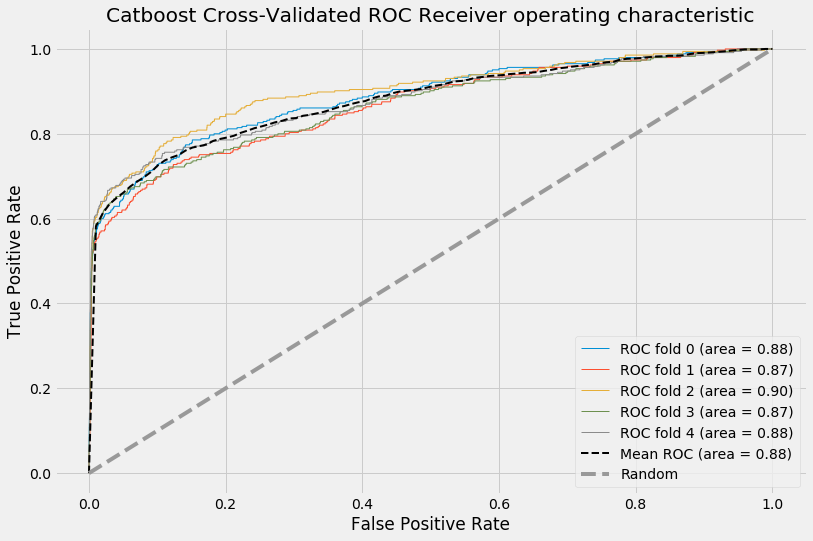

In [133]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc(X_main, y_main, cbc, 'Catboost Cross-Validated ROC', ax, cat=True)

In [136]:
cbc.fit(X_main, y_main)
preds_proba = cbc.predict_proba(X_holdout)

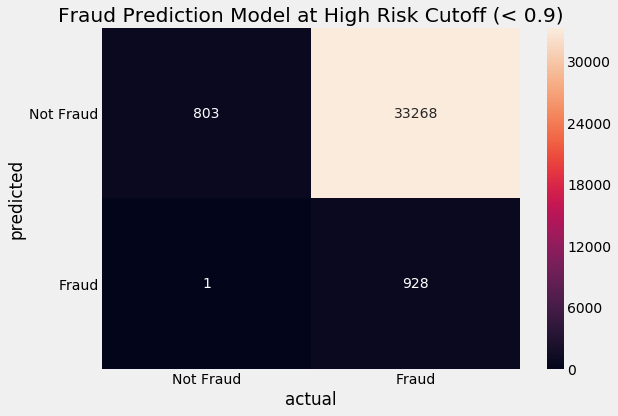

In [149]:
fig, ax = plt.subplots(figsize=(9, 6))
confusion_matrix = metrics.confusion_matrix(y_holdout, (preds_proba[:,1] > .001).astype(int))

sn.heatmap(confusion_matrix, fmt='', annot=True, ax=ax)
ax.set_xlabel('actual')
ax.set_ylabel('predicted')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'], rotation=360)
ax.set_title('Fraud Prediction Model at High Risk Cutoff (< 0.9)')
fig.tight_layout()
#plt.savefig('confusion_highrisk.png')

In [146]:
metrics.roc_auc_score(y_holdout, (preds_proba[:,1] > .05).astype(int))

0.8012360625135398